<a href="https://colab.research.google.com/github/hhumphrey1/EquityinAthletics/blob/main/CapstoneIII_HH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equity In Athletics 

Overview: 
The goal of this research is to analyze collegiate institutions in the United States to determine if male athletes have a monetary advantage over female athletes in the form of financial aid, recruitment money spent, and head coach salaries.

Data collected from US Department of Education. This data comes from the OPE Equity in Athletics Disclosure Website database. https://ope.ed.gov/athletics/#/


This database consists of athletics data that are submitted annually as required by the Equity in Athletics Disclosure Act (EADA), via a Web-based data collection, by all co-educational postsecondary institutions that receive Title IV funding (i.e., those that participate in federal student aid programs) and that have an intercollegiate athletics program.

This data consists of information from 1271 collegiate institutions in the United States from 2003 - 2021. There are 22,361 records across 25 fields.

Goals

1. Look at the relationship between financial aid packages received by student athletes. Is there any difference in the financial aid offered to male and female athletes?
2. Look at the relationship between recruitment funds spent on collegiate athletes. Is there any difference in funds spent recruiting male athletes versus female athletes?
3. Look at the relationship between head coach salaries for men’s teams and women’s teams. Is there any difference in compensation for male teams versus female teams? 



# Importing the Data

In [ ]:
# imports
import psycopg2
from sqlalchemy import create_engine
import pandas as pd
from scipy import stats
from scipy.stats.stats import ttest_ind

# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set()

# supporessing warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# connecting google drive and google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# creating DataFrame
        
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Capstone III Equity in Athletics.csv')
df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Sanction Name,Male Undergraduates,Female Undergraduates,Total Undergraduates,Total Men's Team Participation,...,Men's Team Athletic Student Aid,Women's Team Athletic Student Aid,Men's Team Recruiting Expenses,Women's Team Recruiting Expenses,Total Men's Team Operating Expenses,Total Women's Team Operating Expenses,Grand Total Operating Expenses,Total Men's Team Expenses,Total Women's Team Expenses,Grand Total Expenses
0,2003,222178,Abilene Christian University,TX,NCAA Division II (with football),NCAA,1741.0,2136.0,3877.0,229.0,...,"$1,362,552.00","$816,817.00","$53,474.00","$12,450.00","$359,819.00","$216,521.00","$576,340.00","$2,684,768.00","$1,460,907.00","$4,849,383.00"
1,2003,126182,Adams State College,CO,NCAA Division II (with football),NCAA,746.0,872.0,1618.0,241.0,...,"$452,266.00","$314,099.00","$4,620.00","$3,200.00","$144,471.00","$101,109.00","$245,580.00","$912,866.00","$688,523.00","$1,722,680.00"
2,2003,188429,Adelphi University,NY,NCAA Division II (without football),NCAA,1026.0,2402.0,3428.0,149.0,...,"$944,162.00","$783,270.00","$7,323.00","$5,697.00","$230,246.00","$192,115.00","$422,361.00","$1,102,805.00","$932,825.00","$3,023,868.00"
3,2003,168528,Adrian College,MI,NCAA Division III (with football),NCAA,439.0,547.0,986.0,238.0,...,$-,$-,"$10,491.00","$6,852.00","$295,147.00","$114,812.00","$409,959.00","$342,035.00","$123,490.00","$697,697.00"
4,2003,100654,Alabama A & M University,AL,NCAA Division I-AA,NCAA,2362.0,2584.0,4946.0,216.0,...,"$1,146,740.00","$626,539.00","$61,625.00","$11,243.00","$759,135.00","$323,137.00","$1,082,272.00","$3,251,174.00","$1,348,822.00","$6,738,484.00"


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22360 entries, 0 to 22359
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Survey Year                                                         22360 non-null  int64  
 1   UNITID                                                              22360 non-null  int64  
 2   Institution Name                                                    22360 non-null  object 
 3   State CD                                                            22360 non-null  object 
 4   Classification Name                                                 22347 non-null  object 
 5   Sanction Name                                                       22360 non-null  object 
 6   Male Undergraduates                                                 22355 non-null  float64
 7   Female Underg

Looking at the DataFrame

In [ ]:
df.head()

,Survey Year,UNITID,Institution Name,State CD,Classification Name,Sanction Name,Male Undergraduates,Female Undergraduates,Total Undergraduates,Total Men's Team Participation,...,Men's Team Athletic Student Aid,Women's Team Athletic Student Aid,Men's Team Recruiting Expenses,Women's Team Recruiting Expenses,Total Men's Team Operating Expenses,Total Women's Team Operating Expenses,Grand Total Operating Expenses,Total Men's Team Expenses,Total Women's Team Expenses,Grand Total Expenses
0,2003,222178,Abilene Christian University,TX,NCAA Division II (with football),NCAA,1741.0,2136.0,3877.0,229.0,...,"$1,362,552.00","$816,817.00","$53,474.00","$12,450.00","$359,819.00","$216,521.00","$576,340.00","$2,684,768.00","$1,460,907.00","$4,849,383.00"
1,2003,126182,Adams State College,CO,NCAA Division II (with football),NCAA,746.0,872.0,1618.0,241.0,...,"$452,266.00","$314,099.00","$4,620.00","$3,200.00","$144,471.00","$101,109.00","$245,580.00","$912,866.00","$688,523.00","$1,722,680.00"
2,2003,188429,Adelphi University,NY,NCAA Division II (without football),NCAA,1026.0,2402.0,3428.0,149.0,...,"$944,162.00","$783,270.00","$7,323.00","$5,697.00","$230,246.00","$192,115.00","$422,361.00","$1,102,805.00","$932,825.00","$3,023,868.00"
3,2003,168528,Adrian College,MI,NCAA Division III (with football),NCAA,439.0,547.0,986.0,238.0,...,$-,$-,"$10,491.00","$6,852.00","$295,147.00","$114,812.00","$409,959.00","$342,035.00","$123,490.00","$697,697.00"
4,2003,100654,Alabama A & M University,AL,NCAA Division I-AA,NCAA,2362.0,2584.0,4946.0,216.0,...,"$1,146,740.00","$626,539.00","$61,625.00","$11,243.00","$759,135.00","$323,137.00","$1,082,272.00","$3,251,174.00","$1,348,822.00","$6,738,484.00"


Checking Null Value Categories

In [ ]:
# finding null values
null_cats = df.isnull().sum()
print (null_cats)
print('The total sum of null values across all categories is {}'.format(df.isnull().sum().sum()))

Survey Year                                                             0
UNITID                                                                  0
Institution Name                                                        0
State CD                                                                0
Classification Name                                                    13
Sanction Name                                                           0
Male Undergraduates                                                     5
Female Undergraduates                                                   5
Total Undergraduates                                                    5
Total Men's Team Participation                                          1
Total Women's Team Participation                                        1
 Men's Team Average Annual Institutional Salary per Head Coach        181
Men's Team Number of Head Coaches Included in Average                 182
  Women's Team Average Annual Institut

# Data Cleaning

Removing the Nulls from the data set

In [ ]:
# removing some of the NaN categories for later statistical analysis
# using dropna because the dataset is so large

# print original size of the DataFrame
print(df.size)

# Drop `NaN` rows
df = df.dropna()

# printing size of the modified DataFrame
print(df.size)

559000
552350


Renaming Columns

In [ ]:
df.columns

Index(['Survey Year', 'UNITID', 'Institution Name', 'State CD',
       'Classification Name', 'Sanction Name', 'Male Undergraduates',
       'Female Undergraduates', 'Total Undergraduates',
       'Total Men's Team Participation', 'Total Women's Team Participation',
       ' Men's Team Average Annual Institutional Salary per Head Coach ',
       'Men's Team Number of Head Coaches Included in Average',
       '  Women's Team Average Annual Institutional Salary per Head Coach ',
       'Women's Team Number of Head Coaches Included in Average',
       ' Men's Team Athletic Student Aid ',
       ' Women's Team Athletic Student Aid ',
       ' Men's Team Recruiting Expenses ',
       ' Women's Team Recruiting Expenses ',
       ' Total Men's Team Operating Expenses ',
       ' Total Women's Team Operating Expenses ',
       ' Grand Total Operating Expenses ', ' Total Men's Team Expenses ',
       ' Total Women's Team Expenses ', ' Grand Total Expenses '],
      dtype='object')

In [ ]:
# renaming column names
df.columns=['Survey_Year', 'UNITID', 'Institution_Name', 'State_CD',
       'Classification_Name', 'Sanction_Name', 'Male_Undergraduates',
       'Female_Undergraduates', 'Total_Undergraduates',
       'Total_Men_Team_Participation', 'Total_Women_Team_Participation',
       'Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach',
       'Men_Team_Number_of_Head_Coaches_Included_in_Average',
       'Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach',
       'Women_Team_Number_of_Head_Coaches_Included_in_Average',
       'Men_Team_Athletic_Student_Aid',
       'Women_Team_Athletic_Student_Aid',
       'Men_Team_Recruiting_Expenses',
       'Women_Team_Recruiting_Expenses',
       'Total_Men_Team_Operating_Expenses',
       'Total_Women_Team_Operating_Expenses',
       'Grand_Total_Operating_Expenses', 'Total_Men_Team_Expenses',
       'Total_Women_Team_Expenses', 'Grand_Total_Expenses']

In [ ]:
df.columns

Index(['Survey_Year', 'UNITID', 'Institution_Name', 'State_CD',
       'Classification_Name', 'Sanction_Name', 'Male_Undergraduates',
       'Female_Undergraduates', 'Total_Undergraduates',
       'Total_Men_Team_Participation', 'Total_Women_Team_Participation',
       'Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach',
       'Men_Team_Number_of_Head_Coaches_Included_in_Average',
       'Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach',
       'Women_Team_Number_of_Head_Coaches_Included_in_Average',
       'Men_Team_Athletic_Student_Aid', 'Women_Team_Athletic_Student_Aid',
       'Men_Team_Recruiting_Expenses', 'Women_Team_Recruiting_Expenses',
       'Total_Men_Team_Operating_Expenses',
       'Total_Women_Team_Operating_Expenses', 'Grand_Total_Operating_Expenses',
       'Total_Men_Team_Expenses', 'Total_Women_Team_Expenses',
       'Grand_Total_Expenses'],
      dtype='object')

Removing "$" from data

In [ ]:
df['Men_Team_Athletic_Student_Aid'] = df['Men_Team_Athletic_Student_Aid'].str.replace('$','')

In [ ]:
df['Women_Team_Athletic_Student_Aid'] = df['Women_Team_Athletic_Student_Aid'].str.replace('$','')

In [ ]:
df['Men_Team_Recruiting_Expenses'] = df['Men_Team_Recruiting_Expenses'].str.replace('$','')

In [ ]:
df['Women_Team_Recruiting_Expenses'] = df['Women_Team_Recruiting_Expenses'].str.replace('$','')

In [ ]:
df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'] = df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'].str.replace('$','')

In [ ]:
df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'] = df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'].str.replace('$','')

Removing "," from data

In [ ]:
df['Men_Team_Athletic_Student_Aid'] = df['Men_Team_Athletic_Student_Aid'].str.replace(',','')

In [ ]:
df['Women_Team_Athletic_Student_Aid'] = df['Women_Team_Athletic_Student_Aid'].str.replace(',','')

In [ ]:
df['Men_Team_Recruiting_Expenses'] = df['Men_Team_Recruiting_Expenses'].str.replace(',','')

In [ ]:
df['Women_Team_Recruiting_Expenses'] = df['Women_Team_Recruiting_Expenses'].str.replace(',','')

In [ ]:
df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'] = df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'].str.replace(',','')

In [ ]:
df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'] = df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'].str.replace(',','')

Removing " - " from data

In [ ]:
df['Men_Team_Athletic_Student_Aid'] = df['Men_Team_Athletic_Student_Aid'].str.replace(' -   ','0')

In [ ]:
df['Women_Team_Athletic_Student_Aid'] = df['Women_Team_Athletic_Student_Aid'].str.replace(' -   ','0')

In [ ]:
df['Men_Team_Recruiting_Expenses'] = df['Men_Team_Recruiting_Expenses'].str.replace(' -   ','0')

In [ ]:
df['Women_Team_Recruiting_Expenses'] = df['Women_Team_Recruiting_Expenses'].str.replace(' -   ','0')

In [ ]:
df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'] = df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'].str.replace(' -   ','0')

In [ ]:
df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'] = df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'].str.replace(' -   ','0')

Changing Columns from String to Intergers

In [ ]:
df['Men_Team_Athletic_Student_Aid']=df['Men_Team_Athletic_Student_Aid'].astype('float')

In [ ]:
df['Women_Team_Athletic_Student_Aid']=df['Women_Team_Athletic_Student_Aid'].astype('float')

In [ ]:
df['Men_Team_Recruiting_Expenses'] = df['Men_Team_Recruiting_Expenses'].astype('float')

In [ ]:
df['Women_Team_Recruiting_Expenses'] = df['Women_Team_Recruiting_Expenses'].astype('float')

In [ ]:
df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'] = df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'].astype('float')

In [ ]:
df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'] = df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'].astype('float')

# Descriptive Statistics

In [ ]:
df.describe()

,Survey_Year,UNITID,Male_Undergraduates,Female_Undergraduates,Total_Undergraduates,Total_Men_Team_Participation,Total_Women_Team_Participation,Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach,Men_Team_Number_of_Head_Coaches_Included_in_Average,Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach,Women_Team_Number_of_Head_Coaches_Included_in_Average,Men_Team_Athletic_Student_Aid,Women_Team_Athletic_Student_Aid,Men_Team_Recruiting_Expenses,Women_Team_Recruiting_Expenses
count,22094.000000,22094.000000,22094.000000,22094.000000,22094.000000,22094.000000,22094.000000,2.209400e+04,22094.000000,22094.000000,22094.000000,2.209400e+04,2.209400e+04,2.209400e+04,22094.000000
mean,2011.598126,182451.087535,2262.556531,2671.679279,4934.235811,222.681995,165.513759,9.275838e+04,6.986422,44118.259437,7.766905,1.251497e+06,1.033249e+06,1.054370e+05,50402.908391
std,5.181042,42982.005758,3011.425843,3259.066512,6209.565446,114.535601,88.707469,1.909038e+05,2.429823,44277.055356,2.544881,1.773941e+06,1.480782e+06,2.412486e+05,92815.508043
min,2003.000000,100654.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2007.000000,153126.000000,546.000000,713.250000,1291.000000,133.000000,99.000000,2.428075e+04,5.000000,20160.500000,6.000000,0.000000e+00,0.000000e+00,8.815000e+03,6056.000000
50%,2012.000000,183026.000000,1002.000000,1330.000000,2336.000000,213.000000,151.000000,3.832450e+04,7.000000,31906.500000,8.000000,6.249295e+05,4.894400e+05,2.542350e+04,15565.000000
75%,2016.000000,213507.000000,2623.750000,3274.000000,5838.750000,296.000000,216.000000,6.937625e+04,8.000000,51619.000000,9.000000,1.718409e+06,1.428965e+06,7.645275e+04,45547.750000
max,2020.000000,490805.000000,28482.000000,28928.000000,57410.000000,1006.000000,648.000000,2.624329e+06,23.000000,870241.000000,29.000000,1.563344e+07,1.344501e+07,4.346403e+06,942370.000000


# Hypotheses
1. There is no significant difference in the average overall amount of financial aid received by male athletes versus female athletes. 
2. There is no significant difference in the average overall amount of recruitment expenses spent on male teams versus female teams.
3. There is no significant difference in the average head coach salary in men’s teams versus women’s teams.



### Hypothesis 1 testing

Scatterplot: Checking Correlation of Sample Populations

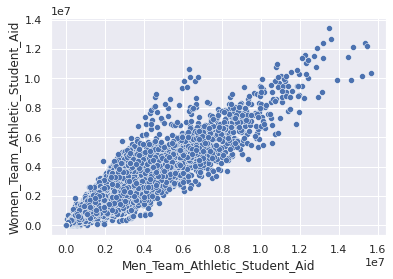

In [ ]:
sns.scatterplot(x="Men_Team_Athletic_Student_Aid", y="Women_Team_Athletic_Student_Aid", data=df)

Histograms: Checking Distribution of Sample Populations


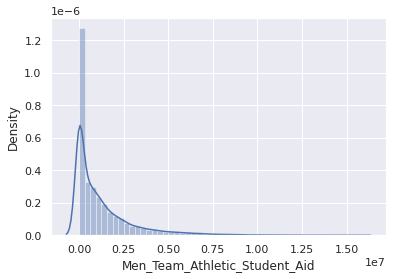

In [ ]:
# distribution first sample population
sns.distplot(df['Men_Team_Athletic_Student_Aid'])

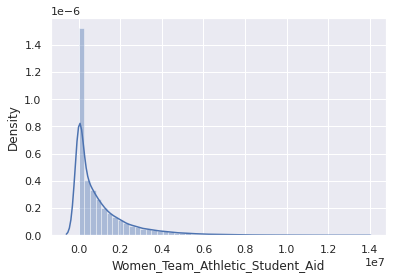

In [ ]:
# distribution second sample population
sns.distplot(df['Women_Team_Athletic_Student_Aid'])

Run an independent-samples t-test on the DataFrames to see if there is a significant difference between financial aid receieved by male athletes versus female athletes.

In [ ]:
stats.ttest_ind(df['Men_Team_Athletic_Student_Aid'], df['Women_Team_Athletic_Student_Aid'])

Ttest_indResult(statistic=14.038920034959055, pvalue=1.1239169536498698e-44)

Finding 95% Confidence Intervals:

In [ ]:
# Defining 95% confidence interval function
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean

    import math
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

In [ ]:
# Plugging in Hypothesis 1 sample populations and t-test
get_95_ci(df['Men_Team_Athletic_Student_Aid'], df['Women_Team_Athletic_Student_Aid'])

'The difference in means at the 95% confidence interval (two-tail) is between -248717.89883061894 and -187777.9003003668.'

###Summary of Findings for Hypothesis 1
The t-test shows that we reject the null hypothesis because the p-value is less than .05 at 1.12e-44. This means that there is a significant difference between financial aid received by male athletes versus female athletes with 95% confidence interval between 248,717 and 187,777.


### Hypothesis 2 testing

Scatterplot: Checking Correlation of Sample Populations

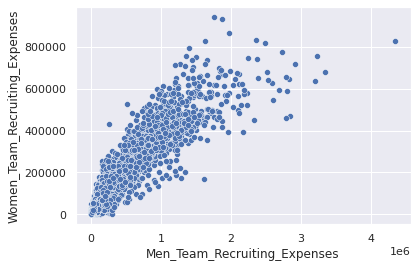

In [ ]:
sns.scatterplot(x='Men_Team_Recruiting_Expenses', y='Women_Team_Recruiting_Expenses', data=df)

Histograms: Checking Distribution of Sample Populations


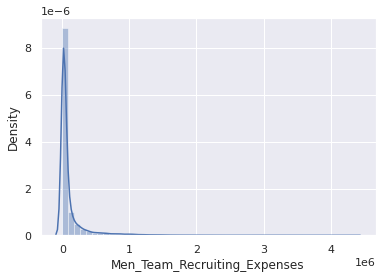

In [ ]:
# distribution first sample population
sns.distplot(df['Men_Team_Recruiting_Expenses'])

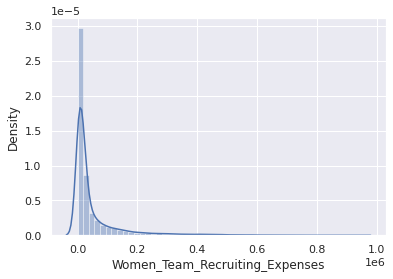

In [ ]:
# distribution second sample population
sns.distplot(df['Women_Team_Recruiting_Expenses'])

Run an independent-samples t-test on the DataFrames to see if there is a significant difference between recruitment funds spent on male athletes versus female athletes.

In [ ]:
stats.ttest_ind(df['Men_Team_Recruiting_Expenses'], df['Women_Team_Recruiting_Expenses'])

Ttest_indResult(statistic=31.646798229410095, pvalue=2.274162118324736e-217)

Finding 95% Confidence Intervals:

In [ ]:
# Plugging in Hypothesis 2 sample populations and t-test
get_95_ci(df['Men_Team_Recruiting_Expenses'], df['Women_Team_Recruiting_Expenses'])

'The difference in means at the 95% confidence interval (two-tail) is between -58442.52006314844 and -51625.605310256105.'

###Summary of Findings for Hypothesis 2
The t-test shows that we reject the null hypothesis because the p-value is less than .05 at 2.27e-217. This means that there is a significant difference between recruitment money spent on male athletes versus female athletes with 95% confidence interval between 58442 and 51625.

### Hypothesis 3 testing

Scatterplot: Checking Correlation of Sample Populations

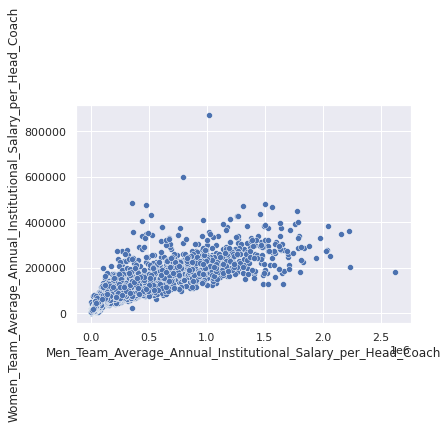

In [ ]:
sns.scatterplot(x='Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach', y='Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach', data=df)

Histograms: Checking Distribution of Sample Populations


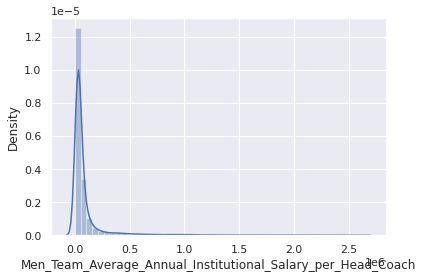

In [ ]:
# distribution first sample population
sns.distplot(df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'])

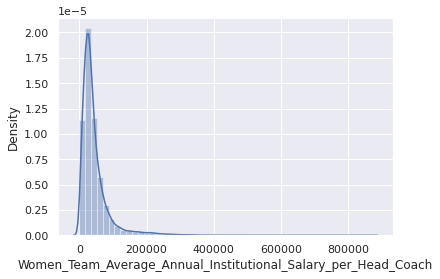

In [ ]:
# distribution second sample population
sns.distplot(df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'])

Run an independent-samples t-test on the DataFrames to see if there is a significant difference between head coach salaries of male teams versus female teams.

In [ ]:
stats.ttest_ind(df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'], df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'])

Ttest_indResult(statistic=36.892612191718186, pvalue=1.7798086203559835e-293)

Finding 95% Confidence Intervals:

In [ ]:
# Plugging in Hypothesis 3 sample populations and t-test
get_95_ci(df['Men_Team_Average_Annual_Institutional_Salary_per_Head_Coach'], df['Women_Team_Average_Annual_Institutional_Salary_per_Head_Coach'])

'The difference in means at the 95% confidence interval (two-tail) is between -51224.22899341741 and -46056.00564041983.'

###Summary of Findings for Hypothesis 3
The t-test shows that we reject the null hypothesis because the p-value is less than .05 at 1.77e-293. This means that there is a significant difference between head coach salaries of male teams versus female teams with 95% confidence interval between 51224 and 46056.

# Results

Based on the t-tests, we reject each null hypothesis with p-values less than .05, meaning we found signficant difference between financial aid received by male athletes versus female athletes, recruitment money spent on male athletes versus female athletes, and head coach salaries of male team versus female teams.
With 95% Confidence:

1.   Financial Aid received between 248,717 and 187,777.
2.   Recruitment Money Spent between 58,442 and 51,625
3.   Head Coach Salaries between 51,224 and 46,056

#What Does This Mean?

Analyzing the data of 1,271 collegiate institutions in the United States from 2003 - 2021 we have found that these institutions have done a poor job of equitably dispersing monetary funds to athletes and coaches in regards to gender. More analysis and research needs to be conducted in order to find where the exact discrepancies lie in terms of monetary funds so this inequity can be addressed and corrected. 